In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')

In [3]:
rank = pd.read_csv("../data/curated/top100.csv")
rank

,rank,merchant_abn,name,tags,revenue_level,take_rate,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue,scaled_pred_total_num_consumer,scaled_pred_total_num_transaction,scaled_pred_total_revenue,score,segment
0,1.0,86578477987,Leo In Consulting,watch,a,6.43,18356.113566,186946.749066,3.992515e+07,81.846275,93.847990,97.593499,91.745679,personal & household good retail
1,2.0,45629217853,Lacus Consulting,gift,a,6.98,20191.435558,152028.388588,3.819332e+07,90.029612,76.318838,93.360191,87.248612,personal & household good retail
2,3.0,89726005175,Est Nunc Consulting,tent,a,6.01,20434.182107,148236.132238,3.587346e+07,91.111971,74.415111,87.689512,84.733930,recreational good retailing
3,4.0,49891706470,Non Vestibulum Industries,tent,a,5.80,19570.482775,169802.295225,3.046344e+07,87.260907,85.241408,74.465184,81.536768,recreational good retailing
4,5.0,21439773999,Mauris Non Institute,cable,a,6.10,22388.332445,81951.886245,3.705975e+07,99.825141,41.140163,90.589293,78.525308,technical & machinery service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,39649557865,Arcu Morbi Institute,artist supply,c,1.47,10963.286716,14797.412785,9.303096e+06,48.883124,7.428358,22.740597,25.989683,personal & household good retail
96,97.0,88699453206,Sed Nec Inc.,health,b,3.53,6768.760541,8087.265249,1.580041e+07,30.180563,4.059838,38.622718,25.721208,health service
97,98.0,76819856970,Egestas Blandit Ltd,tent,b,3.19,8552.531167,10883.510961,1.275453e+07,38.134043,5.463565,31.177332,25.550215,recreational good retailing
98,99.0,41944909975,Et Nunc Consulting,books,e,0.16,15204.952367,23773.080233,1.628021e+06,67.795871,11.934178,3.979555,25.510837,recreational good retailing


In [4]:
value_count = rank['segment'].value_counts()
value_count

personal & household good retail    43
recreational good retailing         30
technical & machinery service       20
health service                       7
Name: segment, dtype: int64

In [5]:
rank['tags'].value_counts()

tent             14
computer         12
watch             9
gift              8
digital goods     7
furniture         5
artist supply     5
motor             5
books             5
opticians         5
florists          5
garden supply     4
stationery        3
shoe              3
cable             3
antique           2
music             2
health            2
hobby             1
Name: tags, dtype: int64

In [6]:
tag_lst = []
for segments in rank['segment'].unique():
    sub_lst = []
    for tags in rank.loc[rank['segment'] == segments]['tags'].unique():
        tag_lst.append(len(rank.loc[rank['tags'] == tags]))
        sub_lst.append(tags)
    print(segments, ": ", sub_lst)
tag_lst


personal & household good retail :  ['watch', 'gift', 'music', 'florists', 'artist supply', 'furniture', 'antique', 'garden supply', 'shoe']
recreational good retailing :  ['tent', 'digital goods', 'hobby', 'books', 'stationery']
technical & machinery service :  ['cable', 'computer', 'motor']
health service :  ['opticians', 'health']


[9, 8, 2, 5, 5, 5, 2, 4, 3, 14, 7, 1, 5, 3, 3, 12, 5, 5, 2]

In [7]:
cmap1 = plt.colormaps['Blues']
inner_colors1 = cmap1(np.arange(9)*30 + 100)
cmap2 = plt.colormaps['Oranges']
inner_colors2 = cmap2(np.arange(5)*30 + 100)
cmap3 = plt.colormaps['Greens']
inner_colors3 = cmap3(np.arange(3)*30 + 100)
cmap4 = plt.colormaps['Purples']
inner_colors4 = cmap4(np.arange(2)*30 + 100)

inner_colors = np.vstack((inner_colors1, inner_colors2, inner_colors3, inner_colors4))

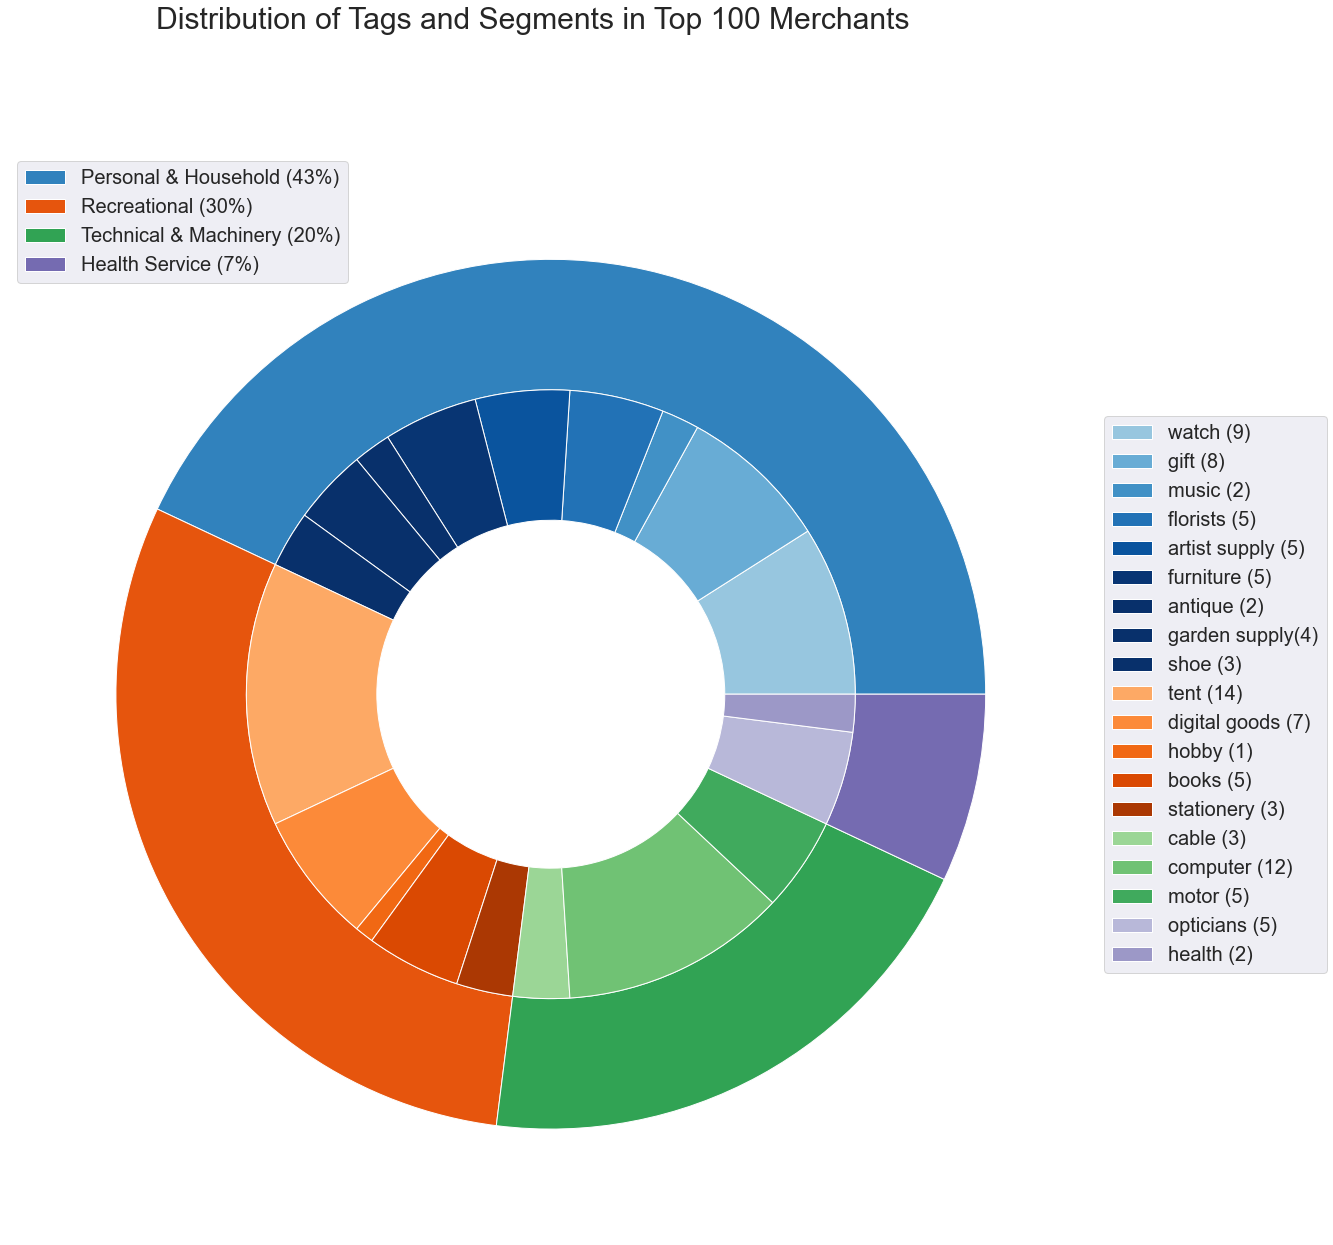

In [24]:
fig, ax = plt.subplots(figsize = (20, 20))
size = 0.3

[9, 8, 2, 5, 5, 5, 2, 4, 3, 14, 7, 1, 5, 3, 3, 12, 5, 5, 2]
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(4)*4)

labels1 = [r'Personal & Household (43%)', r'Recreational (30%)', r'Technical & Machinery (20%)', r'Health Service (7%)']
size1 = [43, 30, 20, 7]
patches1, texts1= ax.pie(size1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
legend1 = plt.legend(patches1, labels1, loc = 'upper left', prop={'size': 20})

labels2 = [r'watch (9)', r'gift (8)', r'music (2)', r'florists (5)', r'artist supply (5)', r'furniture (5)', 
        r'antique (2)', r'garden supply(4)', r'shoe (3)', r'tent (14)', r'digital goods (7)', r'hobby (1)',\
        r'books (5)', r'stationery (3)', r'cable (3)', r'computer (12)', r'motor (5)', r'opticians (5)', r'health (2)']
size2 = tag_lst
patches2, texts2= ax.pie(size2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
plt.legend(patches2, labels2, loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})
plt.gca().add_artist(legend1)

ax.set(aspect="equal")
fig.suptitle('Distribution of Tags and Segments in Top 100 Merchants', fontsize=30)
plt.savefig("../plots/Tag and Segments Distribution in TOP100.png", bbox_inches = 'tight')
plt.show()

In [10]:
def analysis_plots(df):
    sns.stripplot(x = 'rank', y = 'segment', data = df)
    plt.title("Segment Distribution")
    plt.show()
    
    sns.scatterplot(x = df['rank'], y = df['scaled_pred_total_revenue'], palette='coolwarm')
    plt.title("Revenue Distribution")
    plt.show()

    sns.scatterplot(x = df['rank'], y = df['scaled_pred_total_num_consumer'], palette='coolwarm')
    plt.title("Number of Consumer Distribution")
    plt.show()

    sns.scatterplot(x = df['rank'], y = df['scaled_pred_total_num_transaction'], palette='coolwarm')
    plt.title("Number of Transaction Distribution")
    plt.show()
    
    sns.scatterplot(x = df['rank'], y = df['revenue_level'], palette='coolwarm')
    plt.title("Revenue Level Distribution")
    plt.show()

    sns.scatterplot(x = df['rank'], y = df['take_rate'], palette='coolwarm')
    plt.title("Take Rate Distribution")
    plt.show()


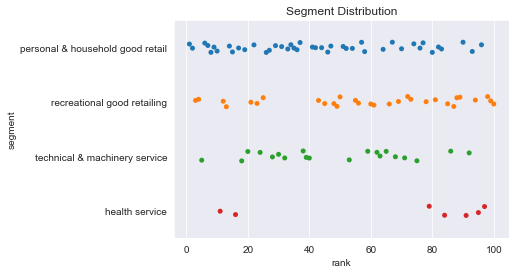

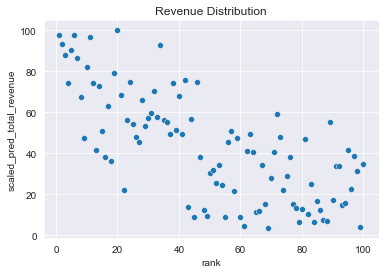

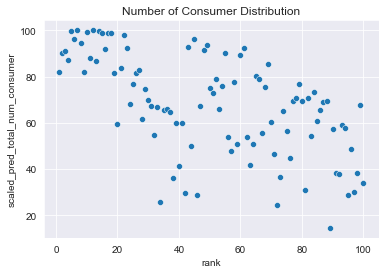

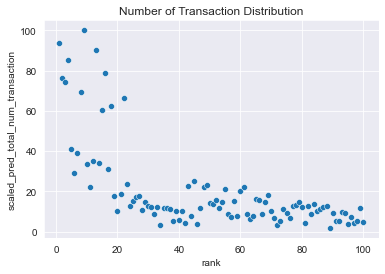

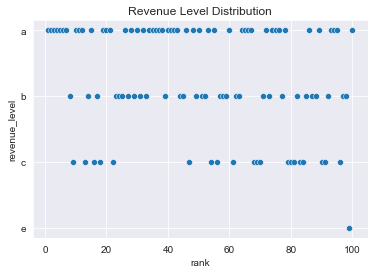

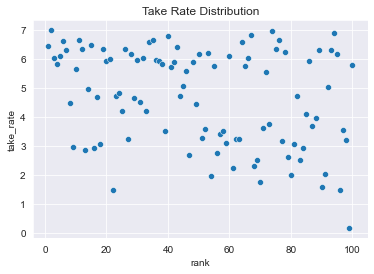

In [11]:
analysis_plots(rank)

In [12]:
personal = rank.loc[rank['segment'] == "personal & household good retail"]
personal.head(5)

,rank,merchant_abn,name,tags,revenue_level,take_rate,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue,scaled_pred_total_num_consumer,scaled_pred_total_num_transaction,scaled_pred_total_revenue,score,segment
0,1.0,86578477987,Leo In Consulting,watch,a,6.43,18356.113566,186946.749066,3.992515e+07,81.846275,93.847990,97.593499,91.745679,personal & household good retail
1,2.0,45629217853,Lacus Consulting,gift,a,6.98,20191.435558,152028.388588,3.819332e+07,90.029612,76.318838,93.360191,87.248612,personal & household good retail
5,6.0,32361057556,Orci In Consequat Corporation,gift,a,6.61,21544.352688,58447.433467,3.986728e+07,96.062002,29.340837,97.452059,76.601675,personal & household good retail
6,7.0,64403598239,Lobortis Ultrices Company,music,a,6.31,22427.549126,77913.665936,3.527895e+07,100.000000,39.112961,86.236284,76.228402,personal & household good retail
7,8.0,43186523025,Lorem Ipsum Sodales Industries,florists,b,4.47,21166.878850,138185.373344,2.754323e+07,94.378921,69.369591,67.326996,76.055352,personal & household good retail


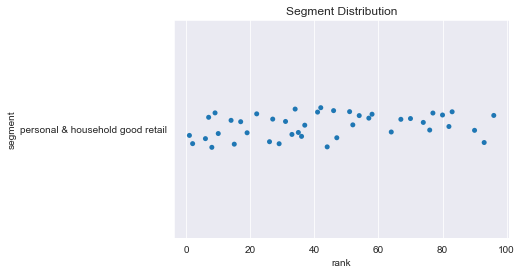

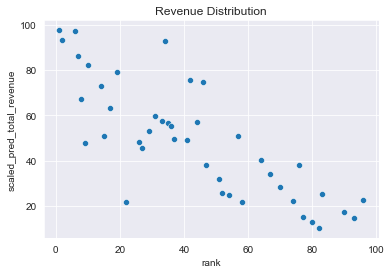

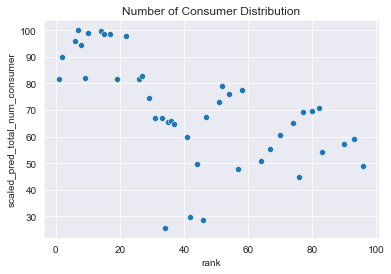

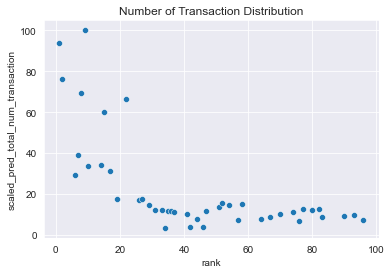

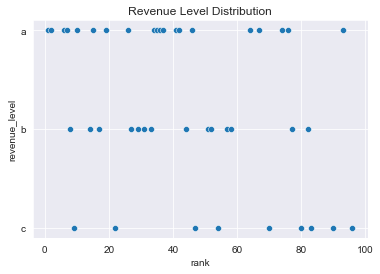

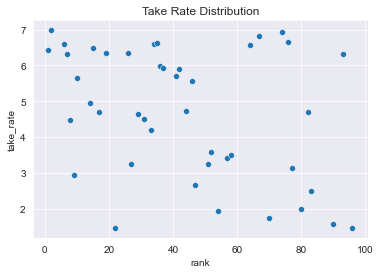

In [13]:
analysis_plots(personal)

Analysis Plots for personal & household good retail


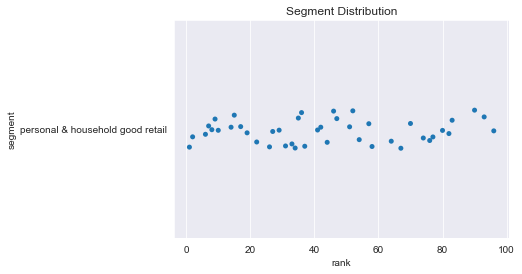

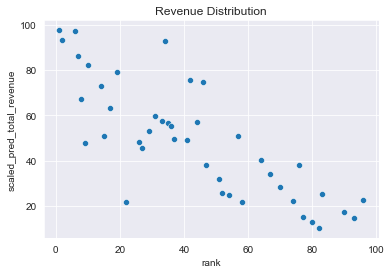

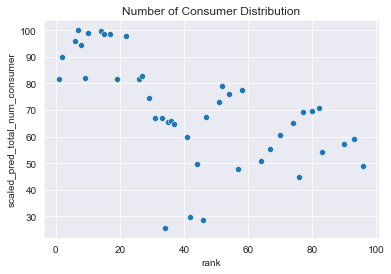

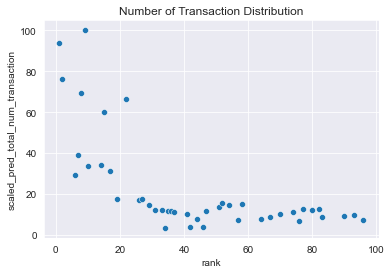

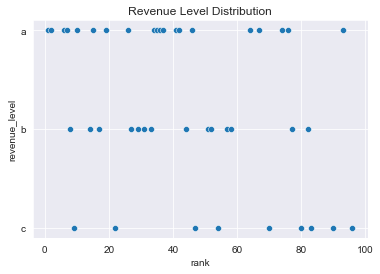

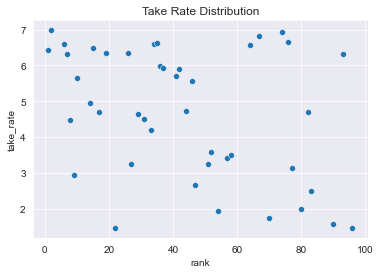

Analysis Plots for recreational good retailing


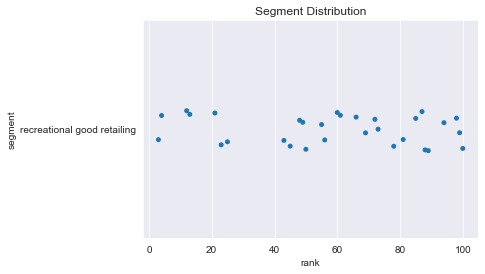

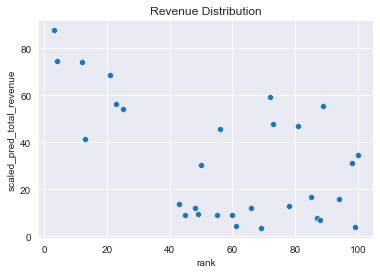

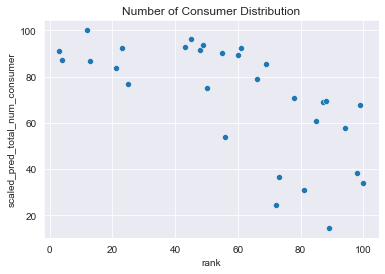

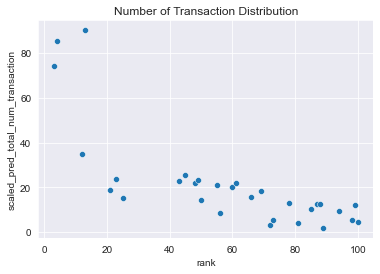

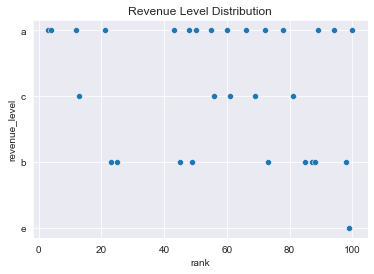

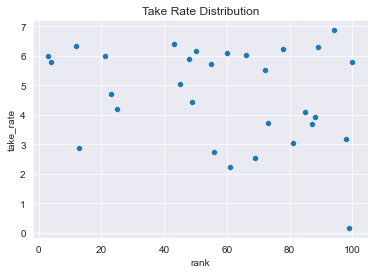

Analysis Plots for technical & machinery service


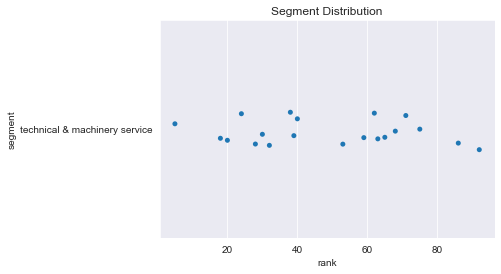

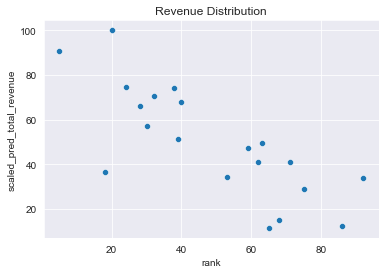

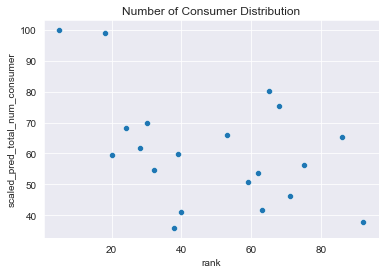

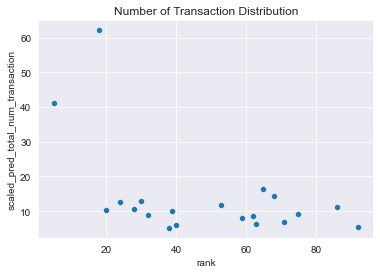

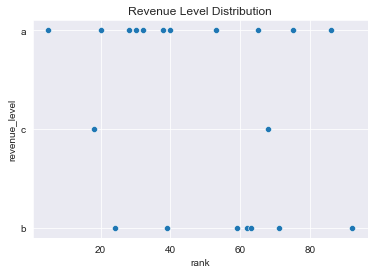

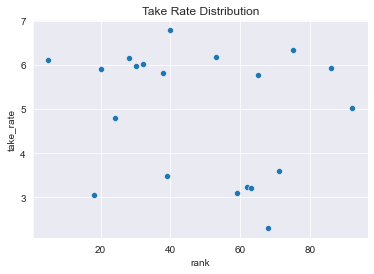

Analysis Plots for health service


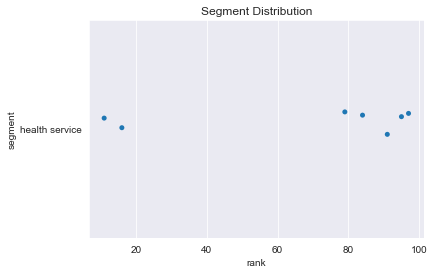

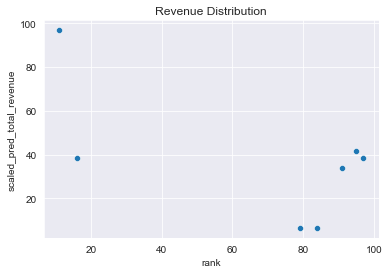

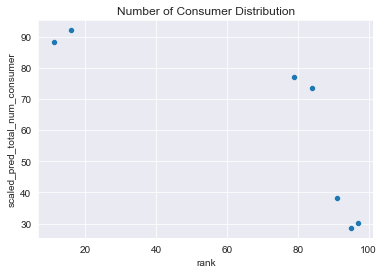

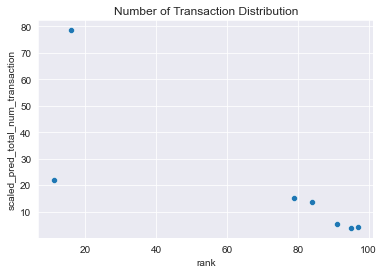

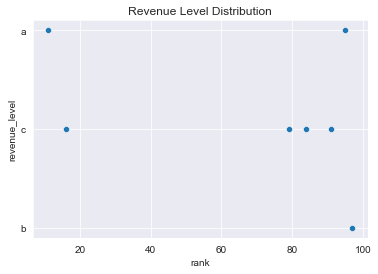

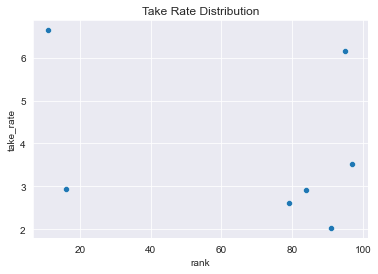

In [14]:
for segments in rank['segment'].unique():
    print(f"Analysis Plots for {segments}")
    analysis_plots(rank.loc[rank['segment'] == segments])

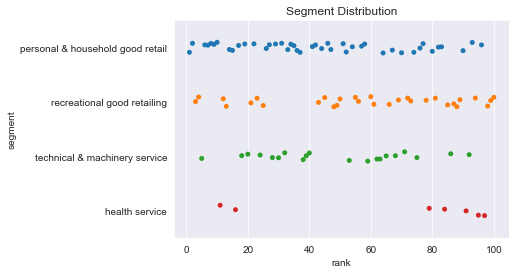

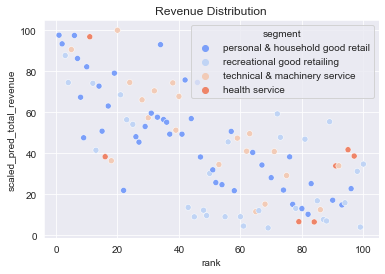

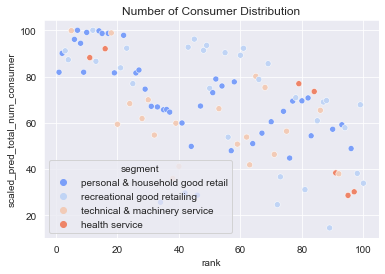

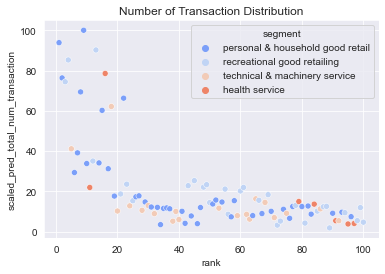

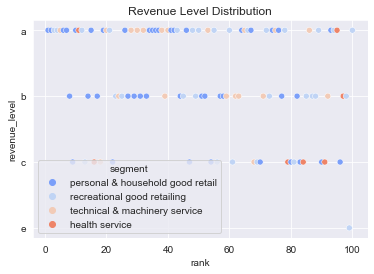

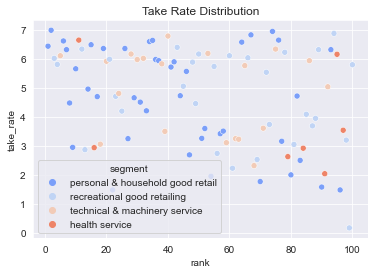

In [15]:
sns.set_style('darkgrid')
sns.stripplot(x = 'rank', y = 'segment', data = rank)
plt.title("Segment Distribution")
plt.show()
    
sns.scatterplot(x = rank['rank'], y = rank['scaled_pred_total_revenue'], palette='coolwarm', hue = rank['segment'])
plt.title("Revenue Distribution")
plt.show()

sns.scatterplot(x = rank['rank'], y = rank['scaled_pred_total_num_consumer'], palette='coolwarm', hue = rank['segment'])
plt.title("Number of Consumer Distribution")
plt.show()

sns.scatterplot(x = rank['rank'], y = rank['scaled_pred_total_num_transaction'], palette='coolwarm', hue = rank['segment'])
plt.title("Number of Transaction Distribution")
plt.show()
    
sns.scatterplot(x = rank['rank'], y = rank['revenue_level'], palette='coolwarm', hue = rank['segment'])
plt.title("Revenue Level Distribution")
plt.show()

sns.scatterplot(x = rank['rank'], y = rank['take_rate'], palette='coolwarm', hue = rank['segment'])
plt.title("Take Rate Distribution")
plt.show()


In [16]:
two = rank.loc[(rank['tags'] == 'tent') | (rank['tags'] == 'computer')]

<AxesSubplot: xlabel='rank', ylabel='pred_total_revenue'>

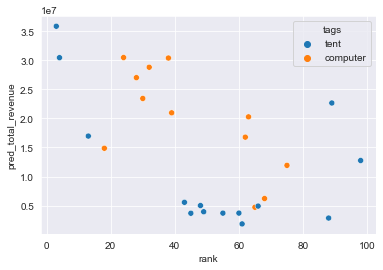

In [17]:
sns.scatterplot(y = two['pred_total_revenue'], x = two['rank'], hue = two['tags'])

<AxesSubplot: xlabel='rank', ylabel='pred_total_num_consumer'>

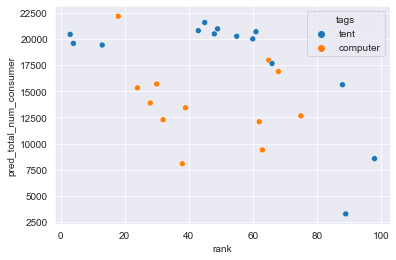

In [18]:
sns.scatterplot(x = 'rank', y = 'pred_total_num_consumer', data = two, hue = 'tags')

<AxesSubplot: xlabel='rank', ylabel='pred_total_num_transaction'>

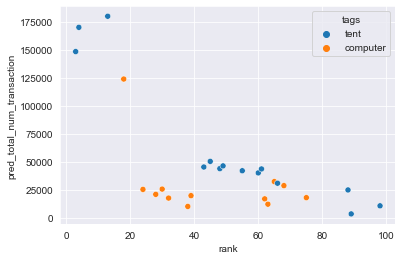

In [19]:
sns.scatterplot(x = 'rank', y = 'pred_total_num_transaction', data = two, hue = 'tags')

In [20]:
recreational = rank.loc[rank['segment'] == 'recreational good retailing']
recreational

,rank,merchant_abn,name,tags,revenue_level,take_rate,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue,scaled_pred_total_num_consumer,scaled_pred_total_num_transaction,scaled_pred_total_revenue,score,segment
2,3.0,89726005175,Est Nunc Consulting,tent,a,6.01,20434.182107,148236.132238,3.587346e+07,91.111971,74.415111,87.689512,84.733930,recreational good retailing
3,4.0,49891706470,Non Vestibulum Industries,tent,a,5.80,19570.482775,169802.295225,3.046344e+07,87.260907,85.241408,74.465184,81.536768,recreational good retailing
11,12.0,72472909171,Nullam Consulting,digital goods,a,6.33,22426.067947,69836.312755,3.032194e+07,99.993396,35.058099,74.119315,70.163174,recreational good retailing
12,13.0,64203420245,Pede Nonummy Corp.,tent,c,2.86,19414.903400,179699.117393,1.696257e+07,86.567209,90.209651,41.463501,69.618459,recreational good retailing
20,21.0,98973094975,Ornare Fusce Inc.,hobby,a,5.98,18782.831996,37209.503637,2.802255e+07,83.748928,18.679315,68.498653,58.127934,recreational good retailing
22,23.0,49505931725,Suspendisse Ac Associates,digital goods,b,4.70,20686.207619,46948.816832,2.305562e+07,92.235703,23.568487,56.357431,57.284230,recreational good retailing
24,25.0,35223308778,Euismod In Corp.,books,b,4.19,17254.851383,30525.128256,2.212446e+07,76.935965,15.323732,54.081279,49.310421,recreational good retailing
42,43.0,57900494384,Porttitor Tellus Corporation,tent,a,6.39,20785.585066,45441.201394,5.556464e+06,92.678807,22.811659,13.582286,40.080054,recreational good retailing
44,45.0,91923722701,Euismod Urna Institute,tent,b,5.05,21565.347776,50446.780809,3.673429e+06,96.155615,25.324479,8.979373,40.035777,recreational good retailing
47,48.0,82065156333,Nascetur Ridiculus PC,tent,a,5.88,20481.703292,44011.081219,4.998175e+06,91.323859,22.093733,12.217597,38.912316,recreational good retailing
